In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
features_origin = np.loadtxt('CollML_testdataset_features.dat')
labels_origin = np.loadtxt('CollML_testdataset_labels.dat')
#delta defines definition/high or low definition. small x: how many elements do you have on an axis.
#delta tells how close the dots ae

In [4]:
print("Shape of features", features_origin.shape)
print("Shape of labels", labels_origin.shape)

Shape of features (500, 2)
Shape of labels (500,)


In [5]:
np.unique(labels_origin)

array([0., 1.])

In [6]:
from sklearn.model_selection import train_test_split

features, features_test, labels, labels_test = train_test_split( 
                features_origin, labels_origin, test_size=0.2,
                shuffle=False)

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [8]:
clf.fit( features, labels )
clf.score( features, labels )

1.0

In [9]:
from sklearn.tree import export_graphviz
export_graphviz( clf, 'Graph_DecisionTree_testdataset.dat' )

In [10]:
clf.feature_importances_

array([0.35356621, 0.64643379])

In [11]:
P1 = np.array([[-1,-1]])
P2 = np.array([[-1,4]])

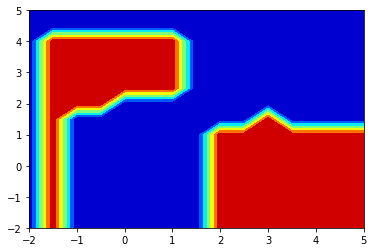

In [12]:
delta = 0.5
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))

plt.show()

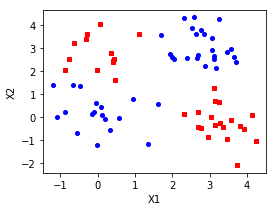

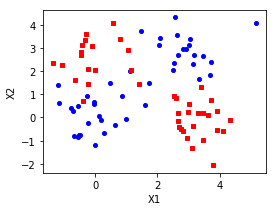

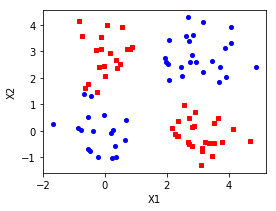

In [13]:
# plot example of sampled data:
np.random.seed(0)  # the random seed, to be sure that you always plot the same thing

for i in range (3):
    plt.figure( figsize=(4,3) )
    
    choice = np.random.random(size=len(labels))>0.8
    plt.plot( features[ np.logical_and(choice , labels == 0), 0 ], features[ np.logical_and(choice , labels == 0), 1 ], 'o',
               markersize=4, color='b')
    plt.plot( features[ np.logical_and(choice , labels == 1), 0 ], features[ np.logical_and(choice , labels == 1), 1 ], 's',
               markersize=4, color='r')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier( n_estimators = 50, 
                            max_depth =5, oob_score = True )
clf.fit( features, labels )
print("Out of bag score",clf.oob_score_)

Out of bag score 0.9425


In [18]:
print("Accuracy score: ",clf.score(features,labels))
print("Features importance: ",clf.feature_importances_)

Accuracy score:  0.9725
Features importance:  [0.49441217 0.50558783]


In [19]:
print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [0.]
Prediction for P2:  [1.]


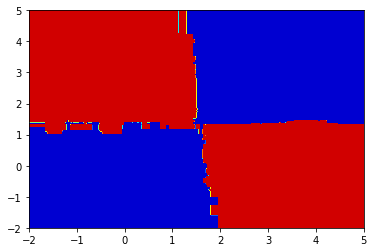

In [20]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
plt.xlim(-2, 5)
plt.ylim(-2, 5)

plt.show()

In [21]:
from sklearn.svm import SVC

In [22]:
clf = SVC()
clf.fit( features, labels )
print( clf.score( features, labels ) )

0.96


In [23]:
clf = SVC(gamma = 10000)
clf.fit( features, labels )
print( clf.score( features, labels ) )

1.0


In [25]:
def plotContours(clf, delta = 0.01):
    
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)

    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )

    plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
    plt.xlim(-2, 5)
    plt.ylim(-2, 5)

    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.tight_layout()
    plt.show()
    
    return

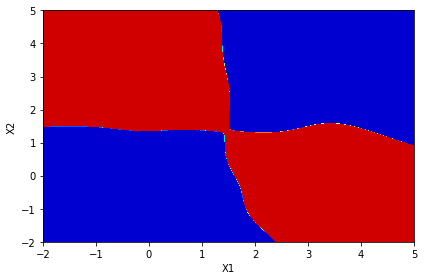

In [37]:
clf = SVC(C=1, gamma = 1)
clf.fit(features, labels)
plotContours(clf)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split( 
        features, labels, test_size=0.33,shuffle=False)

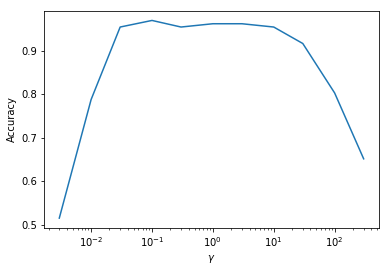

In [42]:
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 1., gamma = gamma )
    clf.fit( X_train, Y_train )
    accuracies.append( clf.score(X_valid, Y_valid) )

plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy')
plt.xlabel(r'$\gamma$')
plt.xscale('log')

plt.show()

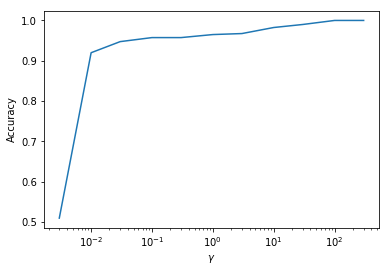

In [43]:
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 1., gamma = gamma )
    clf.fit( features, labels)
    accuracies.append( clf.score(features,labels) )

plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy')
plt.xlabel(r'$\gamma$')
plt.xscale('log')

plt.show()

In [44]:
from sklearn.model_selection import KFold

In [45]:
kf = KFold(n_splits=4)

for train_index, valid_index in kf.split( features ):
    X_train = features[train_index]
    X_valid  = features[valid_index]
    Y_train = labels[train_index]
    Y_valid  = labels[valid_index]
    
    clf = SVC( C = 1., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    print( clf.score(X_valid, Y_valid) )

0.92
0.95
0.96
0.98


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [47]:
clf = RandomForestClassifier( n_estimators = 5 )
clf.fit( features, labels )

print("Accuracy: ", accuracy_score(labels_test, clf.predict(features_test)))
print("Precision: ", precision_score(labels_test, clf.predict(features_test)))
print("Recall: ", recall_score(labels_test, clf.predict(features_test)))
print("F1-score: ", f1_score(labels_test, clf.predict(features_test)))

Accuracy:  0.93
Precision:  0.9534883720930233
Recall:  0.8913043478260869
F1-score:  0.9213483146067417


In [48]:
clf = SVC( C = 1., gamma = 1.)
clf.fit( features, labels )        
        
print("Accuracy: ", accuracy_score(labels_test, clf.predict(features_test)))
print("Precision: ", precision_score(labels_test, clf.predict(features_test)))
print("Recall: ", recall_score(labels_test, clf.predict(features_test)))
print("F1-score: ", f1_score(labels_test, clf.predict(features_test)))

Accuracy:  0.96
Precision:  0.9772727272727273
Recall:  0.9347826086956522
F1-score:  0.9555555555555557
